# Zakelijk inzicht
Hier lees je het doel van deze notebook en welke waarde het oplevert voor de opdrachtgever

## Doel
Het doel van dit notebook is om een voorspelling te kunnen maken van de CV-waarden van de verschillende meetmethoden op basis van tijd. Met een data visualisatie per leverancier om overzicht te bewaren.

## Situatie
Om deze regressie te maken bezitten we over een dataset met waarden per jaar per methode. Per jaar per producent is ook mogelijk.

De data bestaat uit CAP (Amerikaanse) en EurA1c (Europese) data. Deze data moet gescheiden worden geinterpreteerd.

# Data inzicht
Hier lees je inzicht van het data bestand en de data waar in dit notebook mee wordt gewerkt.

## Verzamelen van de data
Het verzamelen van de data komt oorspronkelijk voor door de CAP en EurA1c rapporten om te zetten van PDF bestanden naar één Excel-bestand.

In [160]:
import pandas as pd
import seaborn as sns

df = df = pd.read_excel("Complete-dataset-FINAL.xlsx")
df['Year'] = pd.to_datetime(df["Year"], format='%Y')

cap = df.loc[df['Source (CAP/EurA1c)'] == 'CAP']
eur = df.loc[df['Source (CAP/EurA1c)'] == 'EURA1c']

Na het verzamelen van de data beschikken we over twee datasets. Die van de CAP data en de EurA1c data. Het "df" object is bevat beide en gebruiken we om een algemene omschrijving te geven van de data. Zie hieronder de reden daarvoor.

<AxesSubplot:xlabel='Year', ylabel='CV'>

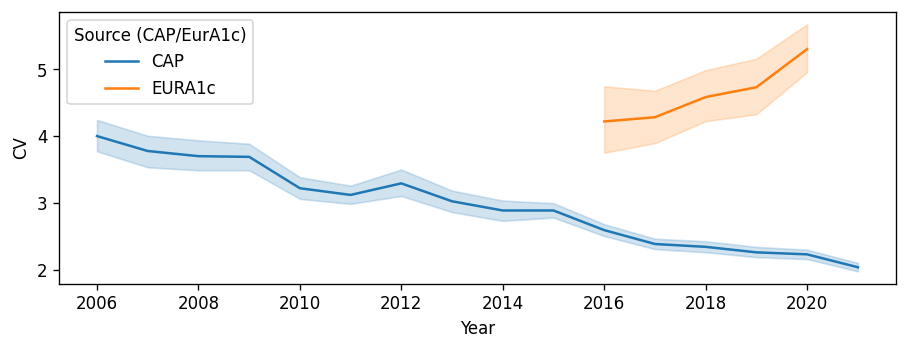

In [134]:
sns.lineplot(x="Year", y="CV", data=df, hue="Source (CAP/EurA1c)")

## Data omschrijving
Hier lees je de omschrijving van de "df" dataset. Een kort overzicht met ruwe cijfers/feiten van de data.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Method name          4684 non-null   object        
 1   N (no. labs)         4684 non-null   object        
 2   Mean                 4602 non-null   float64       
 3   Bias                 4058 non-null   float64       
 4   CV                   4584 non-null   float64       
 5   Sample               4684 non-null   object        
 6   Reference Value      4656 non-null   float64       
 7   Year                 4684 non-null   datetime64[ns]
 8   Source (CAP/EurA1c)  4684 non-null   object        
 9   Type (Fresh/frozen)  4684 non-null   object        
 10  Manufacturer         4684 non-null   object        
 11  Total Error          4684 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 439.2+ KB


Bovenstaand alle kolommen met onder Dtype het type data die de kolom bevat.

Je kunt ook zien dat er 4684 records zijn.

## Data exploratie


<AxesSubplot:>

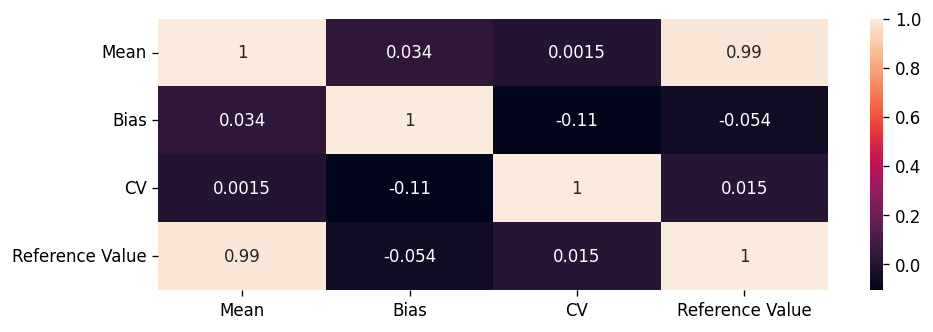

In [136]:
import seaborn as sns

cap_heat = cap.copy()[["Mean", "Bias", "CV", "Reference Value"]].corr()
sns.heatmap(data=cap_heat, annot=True)

<AxesSubplot:>

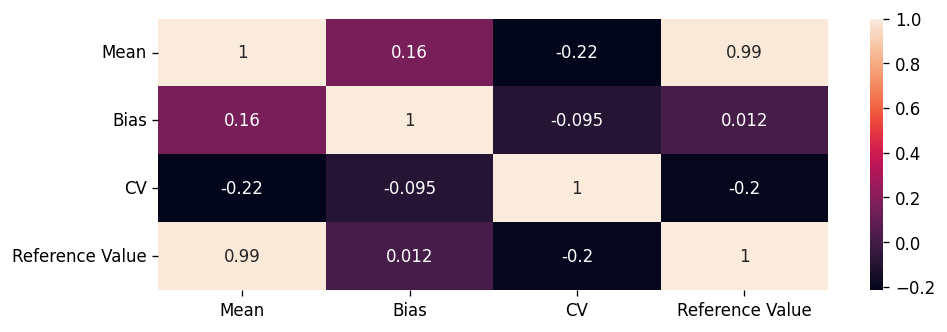

In [137]:
eur_heat = eur.copy()[["Mean", "Bias", "CV", "Reference Value"]].corr()
sns.heatmap(data=eur_heat, annot=True)

# Data voorbereiding
## Selecteren van data
De data die we nodig hebben om de vraag te beantwoorden is een split tussen de Europese en Amerikaanse data. Deze hebben we aan het begin van dit document gemaakt.

Verder hebben we de jaren nodig, gezien we op basis van tijd willen voorspellen.

De CV waarde hebben we nodig gezien we daar naar kijken.

De Methodenaam is nodig gezien we de voorspelling per methode willen zien.

De producentnaam is nodig gezien we een overzicht per producent willen maken.

In [138]:
cap = cap[["Method name", "CV", "Year", "Manufacturer"]]
eur = eur[["Method name", "CV", "Year", "Manufacturer"]]

## Data opschonen

In [139]:
print("Aantal Amerikaanse records pre dropna: " + str(len(cap)))
print("Aantal Europese records pre dropna: " + str(len(eur)))

cap.dropna(inplace=True)
eur.dropna(inplace=True)

print("Aantal Amerikaanse records post dropna: " + str(len(cap)))
print("Aantal Europese records post dropna: " + str(len(eur)))

Aantal Amerikaanse records pre dropna: 4170
Aantal Europese records pre dropna: 514
Aantal Amerikaanse records post dropna: 4070
Aantal Europese records post dropna: 514


Zo te zien worden er bij de Amerikaanse data 100 records uit gegooid met een dropna commando. Die is ervoor om regels met een NaN-waarde te verwijderen.

In [140]:
cap_year = cap.groupby(["Year"]).mean()
cap_year

,CV
Year,
2006-01-01,4.004167
2007-01-01,3.781301
2008-01-01,3.704065
2009-01-01,3.693827
2010-01-01,3.224859
2011-01-01,3.125000
2012-01-01,3.297740
2013-01-01,3.029560
2014-01-01,2.892453


In [141]:
eur_year = eur.groupby(["Year"]).mean()
eur_year

,CV
Year,
2016-01-01,4.222500
2017-01-01,4.286250
2018-01-01,4.587255
2019-01-01,4.733636
2020-01-01,5.303521


# Modellering
De techniek die we gaan gebruiken voor modellering is het ARIMA model. Om een ARIMA model te kunnen maken moeten we eerst een aantal waarden bepalen. (p, d, q)


## CAP

#### D waarde

In [142]:
from statsmodels.tsa.stattools import adfuller

df = cap_year

result = adfuller(df.CV.dropna())
print("p-value no differencing: ", str(result[1]))


result = adfuller(df.CV.diff().dropna())
print("p-value 1x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().dropna())
print("p-value 2x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().dropna())
print("p-value 3x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().diff().dropna())
print("p-value 4x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().diff().diff().dropna())
print("p-value 5x differencing: ", str(result[1]))

d = 1

p-value no differencing:  0.9904716884527985
p-value 1x differencing:  6.307156120658524e-12
p-value 2x differencing:  0.0004352996241847752
p-value 3x differencing:  1.918469350172667e-19
p-value 4x differencing:  0.5875101017130218
p-value 5x differencing:  0.0


Zodra de P-value onder 0.05 duikt is dat de differencing die we aan moeten houden. In dit geval gebeurd dat bij 1x differencing

De "d" waarde = 1

#### P en Q waarden

/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


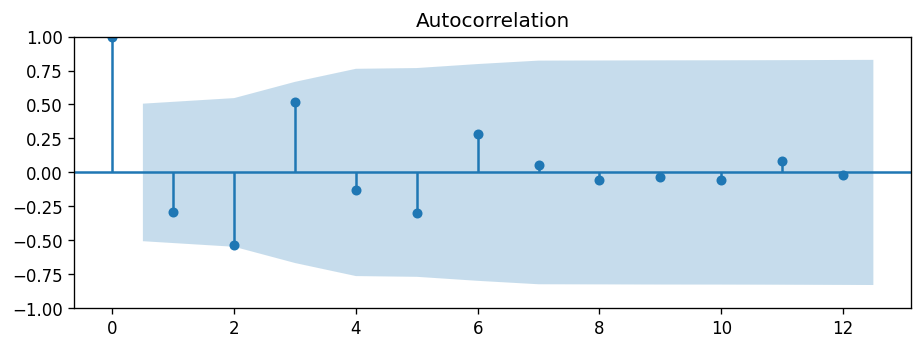

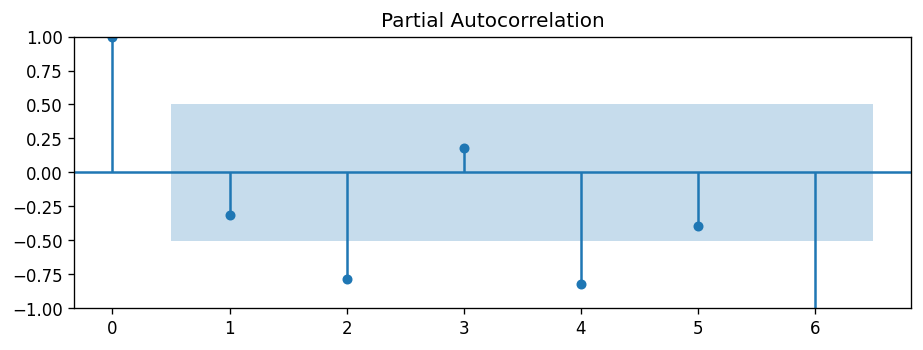

In [143]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

acf_fig = plot_acf(df.CV.diff().dropna())
pacf_fig = plot_pacf(df.CV.diff().dropna(), lags=6)
plt.show()

In [144]:
p = 1
q = 1

#### Het ARIMA model

/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<AxesSubplot:xlabel='Year'>

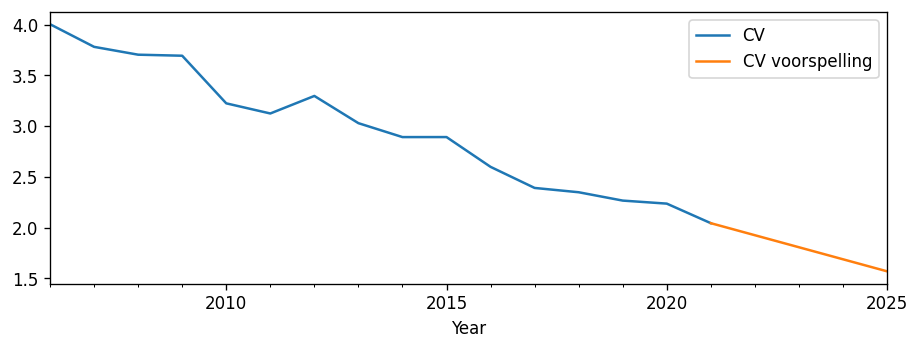

In [145]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=4)
forecast_df = pd.DataFrame(forecast)
forecast_df.reset_index(inplace=True)
forecast_df.columns = ["Year", "CV voorspelling"]
forecast_df


forecast_series = forecast_df.groupby("Year").mean()

combined = pd.concat([df, forecast_series], axis=1)
combined
combined.loc['2021-01-01']["CV voorspelling"] = combined.loc['2021-01-01']["CV"]
combined.plot()

## EurA1c

In [146]:
from statsmodels.tsa.stattools import adfuller

df = eur_year

result = adfuller(df.CV.dropna())
print("p-value no differencing: ", str(result[1]))

result = adfuller(df.CV.diff().dropna())
print("p-value 1x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().dropna())
print("p-value 2x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().dropna())
print("p-value 3x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().diff().dropna())
print("p-value 4x differencing: ", str(result[1]))

result = adfuller(df.CV.diff().diff().diff().diff().diff().dropna())
print("p-value 5x differencing: ", str(result[1]))

d = 1

p-value no differencing:  0.9966007670352908
p-value 1x differencing:  0.6476985711765333


ValueError: sample size is too short to use selected regression component

Zodra de P-value onder 0.05 duikt is dat de differencing die we aan moeten houden. In dit geval gebeurd dat bij 1x differencing

De "d" waarde = 1

#### P en Q waarden

/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Year
2017-01-01    0.063750
2018-01-01    0.301005
2019-01-01    0.146381
2020-01-01    0.569885
Name: CV, dtype: float64

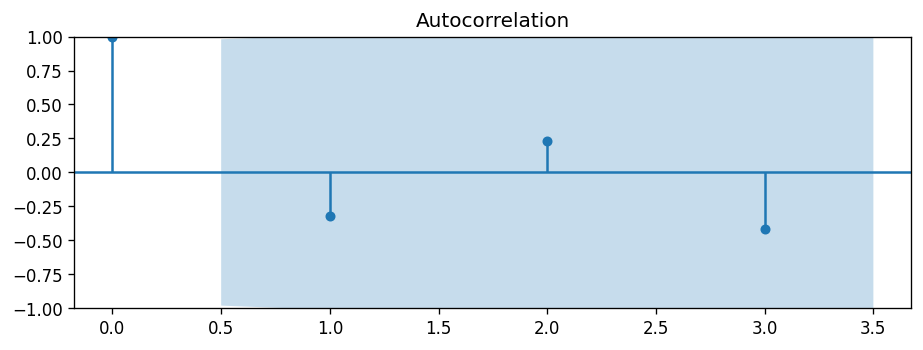

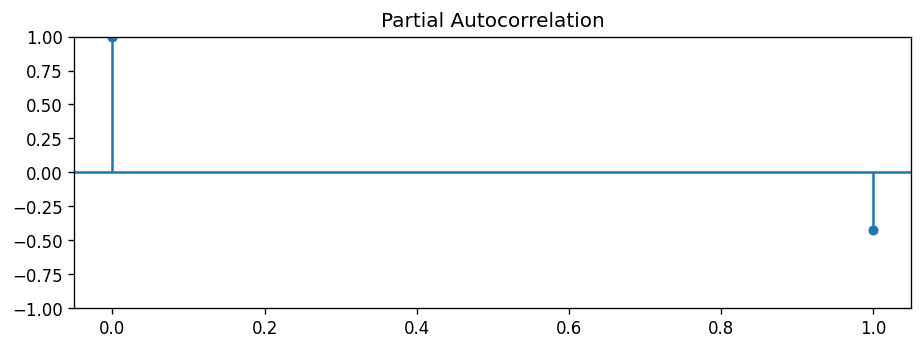

In [153]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

acf_fig = plot_acf(df.CV.diff().dropna())
pacf_fig = plot_pacf(df.CV.diff().dropna(), lags=1)
# plt.show()

df.CV.diff().dropna()

In [158]:
p = 1
q = 1

#### Het ARIMA model

/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<AxesSubplot:xlabel='Year'>

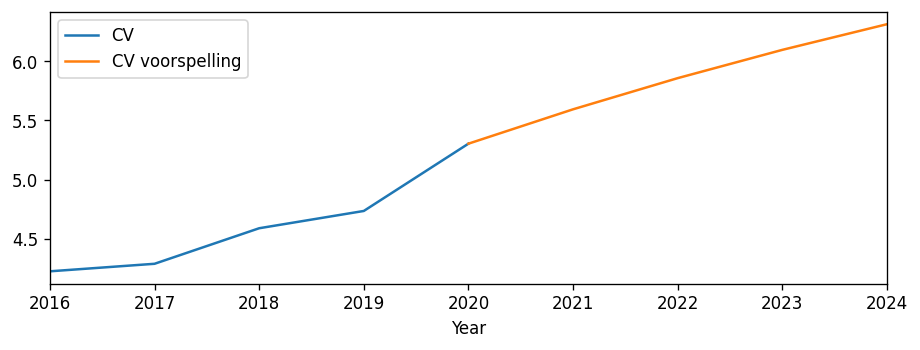

In [159]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=4)
forecast_df = pd.DataFrame(forecast)
forecast_df.reset_index(inplace=True)
forecast_df.columns = ["Year", "CV voorspelling"]
forecast_df


forecast_series = forecast_df.groupby("Year").mean()

combined = pd.concat([df, forecast_series], axis=1)
combined
combined.loc['2020-01-01']["CV voorspelling"] = combined.loc['2020-01-01']["CV"]
combined.plot()